# Importing Data and Getting to Know It

In [1]:
# Importing Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# Importing Data 
df = pd.read_csv('https://archive.ics.uci.edu/static/public/15/data.csv')

In [3]:
df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [5]:
df.shape

(699, 11)

In [6]:
df.isna().sum()

Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

# Handling Missing values and Preprocessing

In [7]:
# Imputing Bare Nuclei with median values to handle null values
imputer = SimpleImputer(strategy='median')
df['Bare_nuclei'] = imputer.fit_transform(df[['Bare_nuclei']])

In [8]:
# Dropping Unnecessary Column
df = df.drop(columns=["Sample_code_number"])

In [9]:
# Map target values
df['Class'] = df['Class'].map({2: 0, 4: 1})

In [10]:
# Separate features and target
X = df.drop(columns=["Class"])
y = df["Class"]

In [11]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (559, 9), Test set: (140, 9)


# Support Vector Regression

In [14]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{title} - Accuracy: {accuracy:.2f}")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [15]:
# Function to plot decision boundaries (for 2D subsets)
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))
    display = DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict", cmap=plt.cm.Paired, alpha=0.5
    )
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

In [16]:
# Prepare data for decision boundary (2D subset for visualization)
X_train_2d = X_train[:, :2]  # Use the first two features
X_test_2d = X_test[:, :2]

SVM with rbf kernel - Accuracy: 0.98


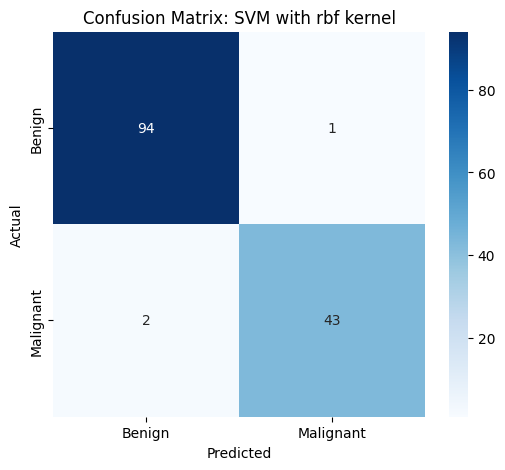

<Figure size 800x600 with 0 Axes>

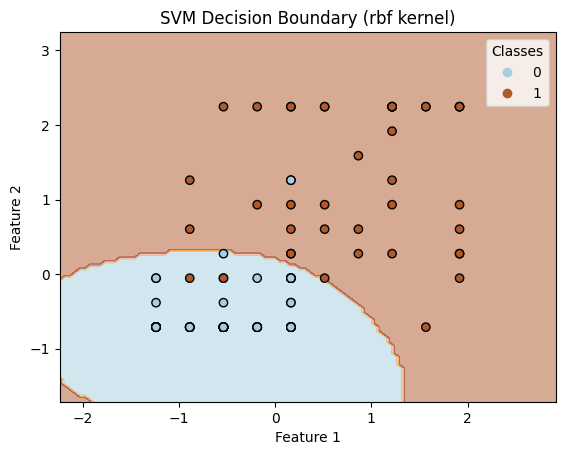

In [17]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
    
# Evaluate model
evaluate_model(y_test, y_pred, f"SVM with rbf kernel")
    
# Plot decision boundaries for rbf kernel
svm_model_2d = SVC(kernel='rbf', random_state=42)
svm_model_2d.fit(X_train_2d, y_train)
plot_decision_boundary(svm_model_2d, X_test_2d, y_test, f"SVM Decision Boundary (rbf kernel)")


# Decision Tree Classifiers

In [18]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{title} - Accuracy: {accuracy:.2f}")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Best Decision Tree - Accuracy: 0.94


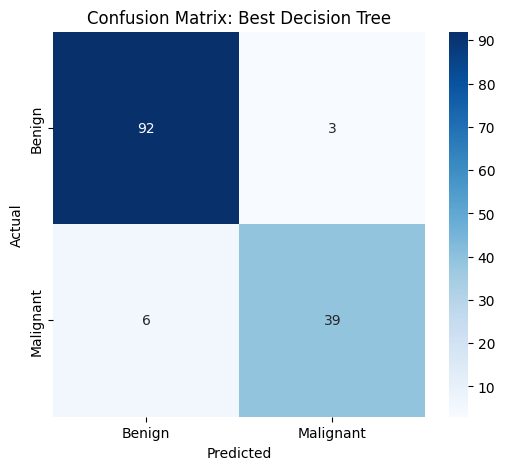

In [19]:
# Decision Tree Hyperparameter Tuning
dt_hyperparameters = {
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search for Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Decision Tree Model
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Best Decision Tree")

In [20]:
print("Best Hyperparameters for Decision Tree:", grid_search.best_params_)

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}


In [21]:
# Checking potential overfitting

train_accuracy = accuracy_score(y_train, best_dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Arbitrary threshold
    print("The Decision Tree is likely overfitting.")
else:
    print("The Decision Tree does not show significant signs of overfitting.")

Training Accuracy: 0.97
Test Accuracy: 0.94
The Decision Tree does not show significant signs of overfitting.


In [22]:
def plot_feature_importance(model, feature_names):
    # Get feature importances and normalize them
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort in descending order

    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(feature_names)), importances[indices], align='center', color='skyblue', edgecolor='black')
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.title("Feature Importance", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Importance Score", fontsize=14)
    plt.tight_layout()
    plt.show()


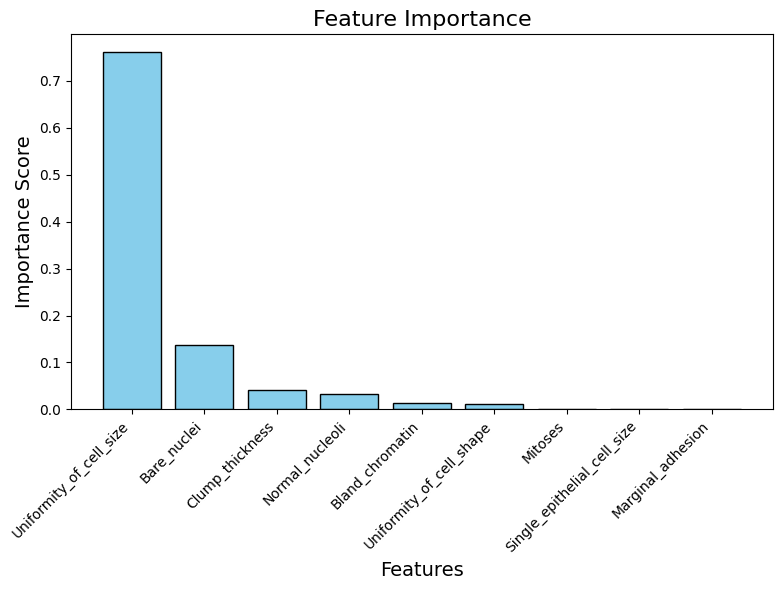

In [23]:
# Feature Importance Plot
feature_names = ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
                 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei',
                 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']
plot_feature_importance(best_dt_model, feature_names)

# Random Forests

In [24]:
# Random Forest Hyperparameter Tuning
rf_hyperparameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search for Random Forest
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_hyperparameters, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [25]:
print("Best Hyperparameters for Random Forests:", grid_search_rf.best_params_)

Best Hyperparameters for Random Forests: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 10}


Best Random Forest - Accuracy: 0.97


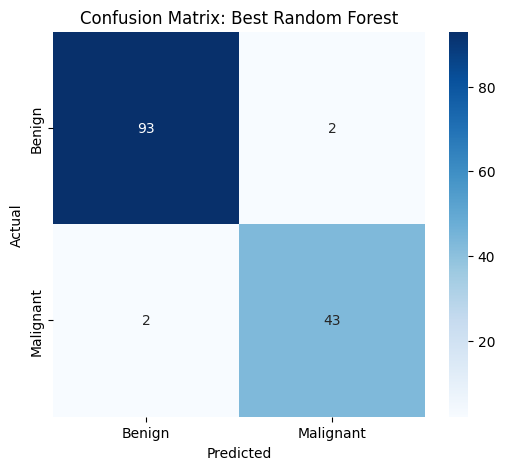

In [26]:
# Best Random Forest Model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Best Random Forest")


In [ ]:
# Random Forest Hyperparameter Tuning for 2D Visualization
rf_model_2d = RandomForestClassifier(random_state=42)
grid_search_rf_2d = GridSearchCV(estimator=rf_model_2d, param_grid=rf_hyperparameters, cv=5, scoring='accuracy')
grid_search_rf_2d.fit(X_train_2d, y_train)

# Best Random Forest Model for 2D
best_rf_model_2d = grid_search_rf_2d.best_estimator_

# Plot decision boundaries for Random Forest (2D visualization)
plot_decision_boundary(best_rf_model_2d, X_test_2d, y_test, "Random Forest Decision Boundary (2D)")

In [ ]:
plot_feature_importance(best_rf_model, feature_names)